# Example usage of AddCloudMaskTask

Notebook showing some usage examples of the `mask.eotask_cloud_mask` module

In [1]:
from eolearn.core.eoworkflow import EOWorkflow, Dependency

In [2]:
from sentinelhub import BBox, CRS

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from eolearn.io import S2L1CWMSInput, S2L1CWCSInput, AddDEMFeature
from eolearn.mask import AddCloudMaskTask, get_s2_pixel_cloud_detector

Define ROI BBOX and time interval

In [5]:
roi_bbox = BBox(bbox=[128.689942, 37.656454, 128.722946, 37.677434], crs=CRS.WGS84)
time_interval = ('2016-01-01', '2016-04-01')

### Compute cloud maps from new WMS request

In this workflow example, the cloud maps are computed from a new WMS request, as the input eopatch does not have the required data 

In [6]:
layer = 'TRUE_COLOR'

wms_task = S2L1CWMSInput(layer=layer, feature_name='TRUE_COLOR', height=200, maxcc=1)

add_dem = AddDEMFeature(layer='DEM')

cloud_classifier = get_s2_pixel_cloud_detector(all_bands=False)
add_clm = AddCloudMaskTask(cloud_classifier, 'BANDS-S2-L1C', cm_size_y=100, cmask_feature='clm', cprobs_feature='clp')

Run workflow

In [7]:
workflow = EOWorkflow(dependencies=[Dependency(transform=wms_task, inputs=[]),
                                    Dependency(transform=add_dem, inputs=[wms_task]),
                                    Dependency(transform=add_clm, inputs=[add_dem])])
result = workflow.execute({wms_task: {'bbox': roi_bbox, 'time_interval': time_interval}})

Plot results

In [8]:
result[add_clm].features

defaultdict(dict,
            {<FeatureType.DATA: 'data'>: {'TRUE_COLOR': (13, 200, 252, 3),
              'clp': (13, 200, 252, 1)},
             <FeatureType.DATA_TIMELESS: 'data_timeless'>: {'DEM': (200,
               252,
               1)},
             <FeatureType.MASK: 'mask'>: {'IS_DATA': (13, 200, 252, 1),
              'clm': (13, 200, 252, 1)}})

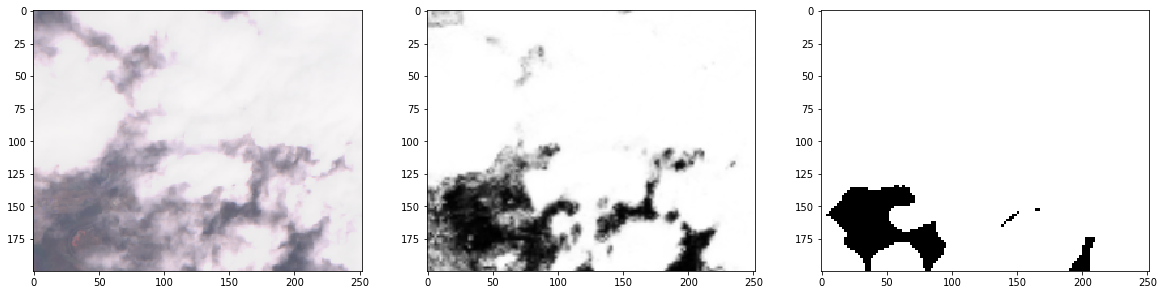

In [9]:
fig = plt.figure(figsize=(20,6))
plt.subplot(131)
plt.imshow(result[add_clm].data['TRUE_COLOR'][10])
plt.subplot(132)
plt.imshow(np.squeeze(result[add_clm].data['clp'][10]), cmap='gray')
plt.subplot(133)
plt.imshow(np.squeeze(result[add_clm].mask['clm'][10]), cmap='gray')

In [10]:
del cloud_classifier, add_clm, workflow

### Compute cloud maps from new WCS request

In this workflow example, the cloud maps are computed from a new WCS request, as the input eopatch does not have the required data 

In [11]:
layer = 'TRUE_COLOR'

wcs_task = S2L1CWCSInput(layer=layer, feature_name='TRUE_COLOR', resx='10m', resy='10m', maxcc=1)

cloud_classifier = get_s2_pixel_cloud_detector(all_bands=False)
add_clm = AddCloudMaskTask(cloud_classifier, 'BANDS-S2-L1C', cm_size_y='20m', cm_size_x='20m', cmask_feature='clm', cprobs_feature='clp')

In [12]:
workflow = EOWorkflow(dependencies=[Dependency(transform=wcs_task, inputs=[]),
                                    Dependency(transform=add_dem, inputs=[wcs_task]),
                                    Dependency(transform=add_clm, inputs=[add_dem])])
result = workflow.execute({wcs_task: {'bbox': roi_bbox, 'time_interval': time_interval}})

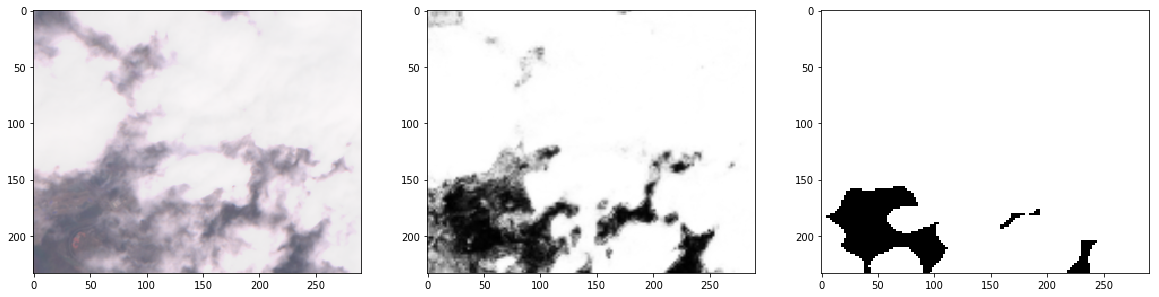

In [13]:
fig = plt.figure(figsize=(20,6))
plt.subplot(131)
plt.imshow(result[add_clm].data['TRUE_COLOR'][10])
plt.subplot(132)
plt.imshow(np.squeeze(result[add_clm].data['clp'][10]), cmap='gray')
plt.subplot(133)
plt.imshow(np.squeeze(result[add_clm].mask['clm'][10]), cmap='gray')

In [14]:
del cloud_classifier, add_clm, workflow, layer

### Compute cloud mask from existing eopatch feature (WMS-style resolution request)

In this workflow example, the cloud maps are computed from an existing feature in the eopatch data dictionary

In [15]:
layer = 'BANDS-S2-L1C'

wms_task = S2L1CWMSInput(layer=layer, feature_name='BANDS-S2-L1C', height=200, maxcc=1)

add_dem = AddDEMFeature(layer='DEM')

cloud_classifier = get_s2_pixel_cloud_detector(all_bands=True)
add_clm = AddCloudMaskTask(cloud_classifier, 'BANDS-S2-L1C', cm_size_y=100, cmask_feature='clm', cprobs_feature='clp')

In [16]:
workflow = EOWorkflow(dependencies=[Dependency(transform=wms_task, inputs=[]),
                                    Dependency(transform=add_dem, inputs=[wms_task]),
                                    Dependency(transform=add_clm, inputs=[add_dem])])
result = workflow.execute({wms_task: {'bbox': roi_bbox, 'time_interval': time_interval}})

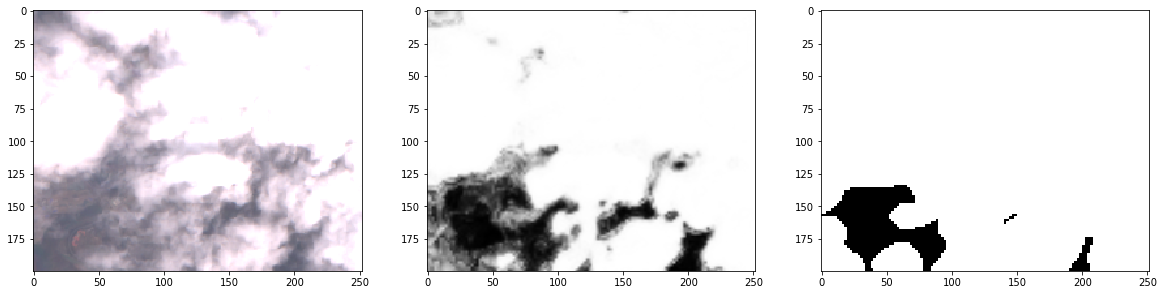

In [17]:
fig = plt.figure(figsize=(20,6))
plt.subplot(131)
img = result[add_clm].data['BANDS-S2-L1C'][10]
plt.imshow(img[..., [3,2,1]]*2.5)
plt.subplot(132)
plt.imshow(np.squeeze(result[add_clm].data['clp'][10]), cmap='gray')
plt.subplot(133)
plt.imshow(np.squeeze(result[add_clm].mask['clm'][10]), cmap='gray')

In [18]:
del cloud_classifier, add_clm, workflow

### Compute cloud mask from existing eopatch feature (WCS-style resolution request)

In this workflow example, the cloud maps are computed from an existing feature in the eopatch data dictionary

In [19]:
layer = 'BANDS-S2-L1C'

wcs_task = S2L1CWCSInput(layer=layer, feature_name='BANDS-S2-L1C', resx='10m', resy='10m', maxcc=1)

add_dem = AddDEMFeature(layer='DEM')

cloud_classifier = get_s2_pixel_cloud_detector(all_bands=True)
add_clm = AddCloudMaskTask(cloud_classifier, 'BANDS-S2-L1C', cm_size_y='20m', cm_size_x='20m', cmask_feature='clm',  cprobs_feature='clp')

In [20]:
workflow = EOWorkflow(dependencies=[Dependency(transform=wcs_task, inputs=[]),
                                    Dependency(transform=add_dem, inputs=[wcs_task]),
                                    Dependency(transform=add_clm, inputs=[add_dem])])
result = workflow.execute({wcs_task: {'bbox': roi_bbox, 'time_interval': time_interval}})

/usr/local/lib/python3.5/dist-packages/scipy/ndimage/interpolation.py:583: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


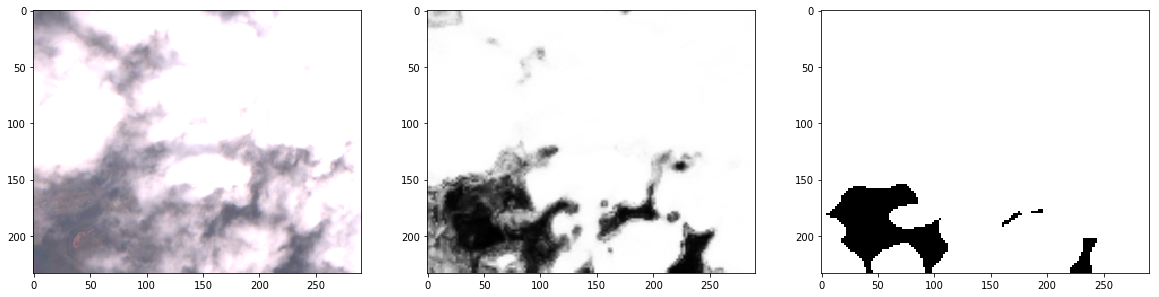

In [21]:
fig = plt.figure(figsize=(20,6))
plt.subplot(131)
img = result[add_clm].data['BANDS-S2-L1C'][10]
plt.imshow(img[..., [3,2,1]]*2.5)
plt.subplot(132)
plt.imshow(np.squeeze(result[add_clm].data['clp'][10]), cmap='gray')
plt.subplot(133)
plt.imshow(np.squeeze(result[add_clm].mask['clm'][10]), cmap='gray')

In [22]:
del cloud_classifier, add_clm, workflow, layer